In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname = 'C:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font', family=font)

df = pd.read_csv('1911-2020 일별 기온.csv', encoding = 'cp949', index_col = 0)

In [59]:
# 데이터 전처리
df.일시 = pd.to_datetime(df.일시) # datetime으로 형변환
df.dropna(axis = 0, how = 'any', inplace = True) # 결측치 제외

# 각 지역별로 데이터 프레임 생성
df_s = df[df.지점명 == '서울']
df_d = df[df.지점명 == '대관령']
df_sg = df[df.지점명 == '서귀포']

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


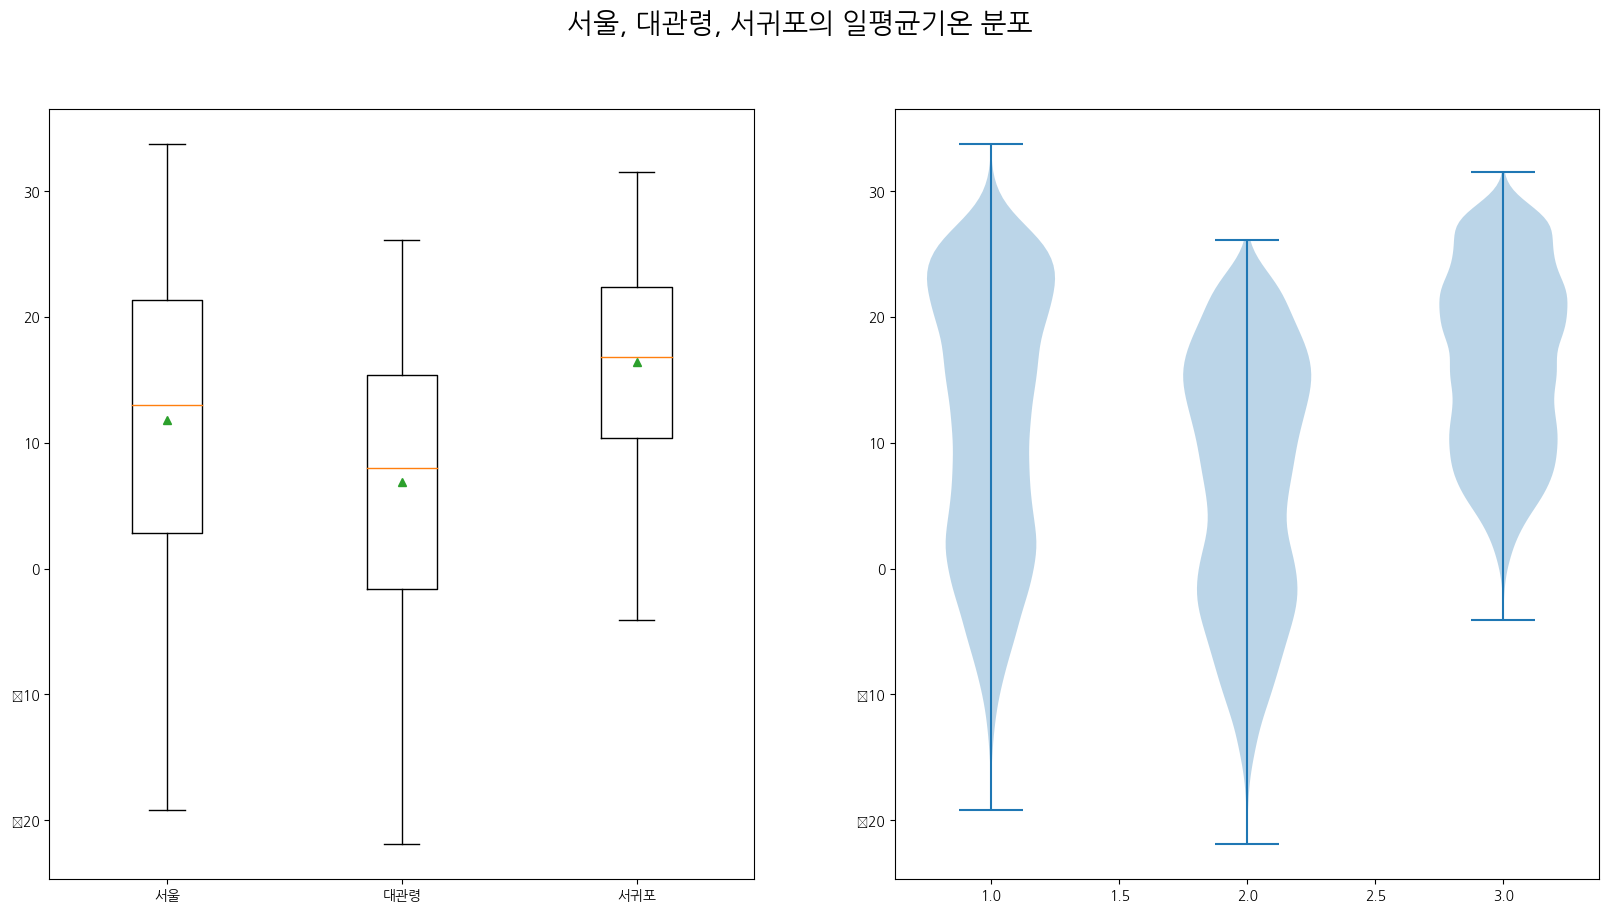

In [61]:
f = plt.figure(figsize = (20,10)) # 프레임 만들기

plt.subplot(1,2,1) # 1줄에 2개 있는 서브플랏의 1번째 그래프
plt.boxplot([df_s, df_d, df_sg], labels = ['서울', '대관령', '서귀포'],
             showmeans = True) # 라벨 지정 및 평균 보여주기

plt.subplot(1,2,2) # 1줄에 2개 있는 서브플랏의 2번째 그래프
plt.violinplot([df_s, df_d, df_sg]) # violin plot

f.get_constrained_layout() # 여백 정리
f.suptitle('서울, 대관령, 서귀포의 일평균기온 분포', fontsize = 20) # 전체 프레임의 제목 지정
plt.show()             


In [74]:
df_s = df.loc[df.지점명 == '서울']
df_s['연도'] = df_s.일시.dt.year
too_hot = df_s.loc[df_s['최고기온(°C)'] >= 33, ['연도', '최고기온(°C)']] # 폭염 데이터프레임 생성
hot_ngt = df_s.loc[df_s['최저기온(°C)'] >= 25, ['연도', '최저기온(°C)']] # 열대야 데이터프레임 생성

C:\Users\sarah\AppData\Local\Temp\ipykernel_15116\2021726791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['연도'] = df_s.일시.dt.year


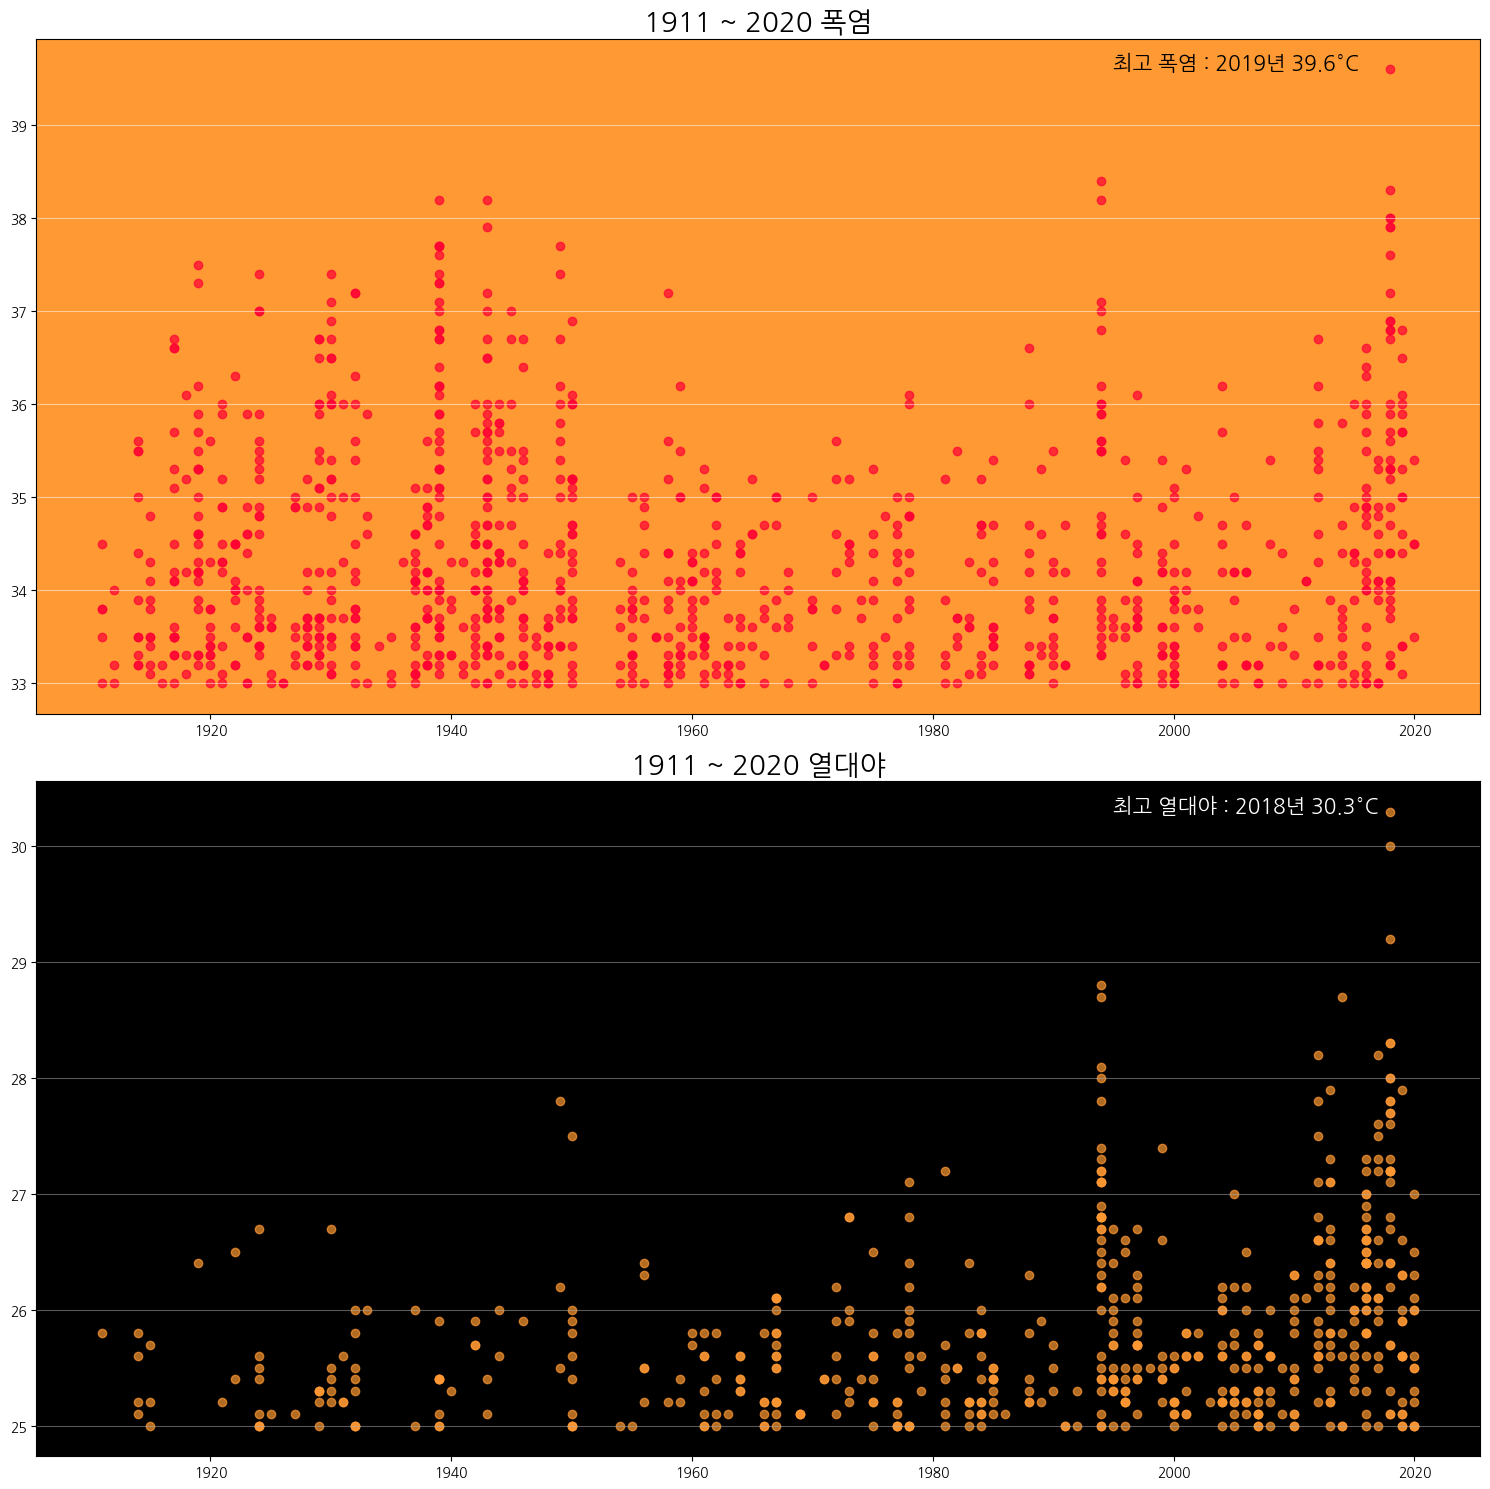

In [139]:
fig,ax = plt.subplots(2, 1, figsize = (15,15)) # 프레임 생성

ax[0].grid(axis = 'y', alpha = 0.50, color = 'white')
# 연도별 최고 기온 산점도
ax[0].scatter(x = too_hot['연도'], y = too_hot['최고기온(°C)'], color = '#ff0033', alpha = 0.7)
ax[0].set_facecolor('#FF9933')
ax[0].set_title('1911 ~ 2020 폭염', fontsize = 20)
# 최고 기온인 점 표시
ax[0].annotate(f'최고 폭염 : 2019년 {too_hot["최고기온(°C)"].max()}°C', xy = (2019,39.6), xytext = (1995, 39.6), fontsize = 15)

ax[1].grid(axis = 'y', alpha = 0.50)
# 연도별 최고 기온 산점도
ax[1].scatter(x = hot_ngt['연도'], y = hot_ngt['최저기온(°C)'], color = '#FF9933',alpha = 0.7)
ax[1].set_facecolor('#000000')
ax[1].set_title('1911 ~ 2020 열대야', fontsize = 20)
# 최고 기온인 점 표시
ax[1].annotate(f'최고 열대야 : 2018년 {hot_ngt["최저기온(°C)"].max()}°C', xy = (2018,30.3), xytext = (1995, 30.3)
                , color = '#ffffff', fontsize = 15)

fig.tight_layout()
plt.show()

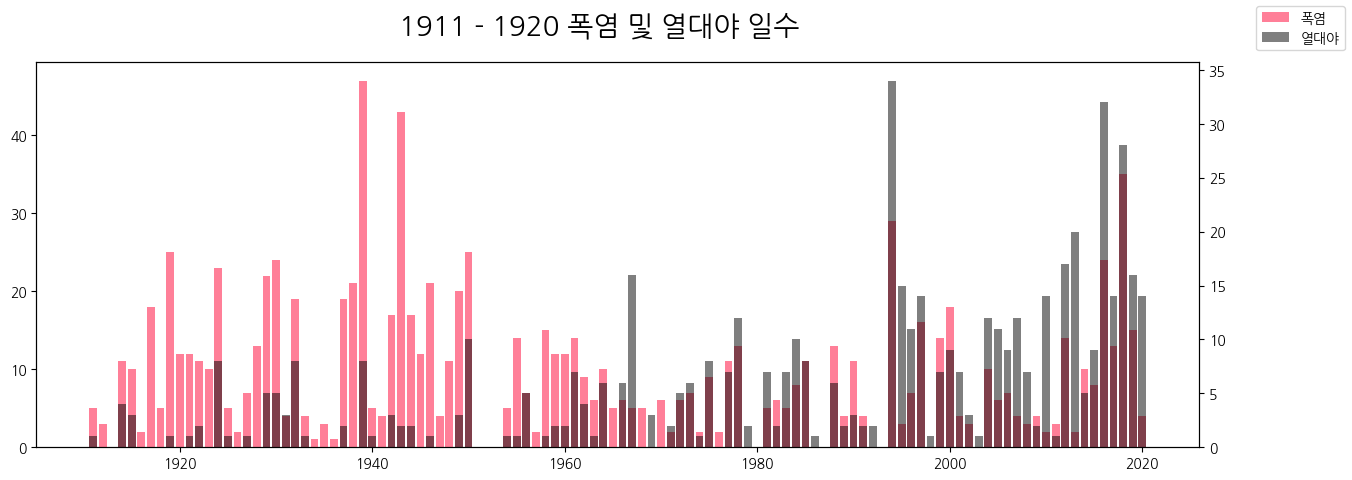

In [174]:
pt = too_hot.pivot_table(index = '연도', aggfunc = 'count') # 연도별 일수 피벗테이블 
pn = hot_ngt.pivot_table(index = '연도', aggfunc = 'count') # 연도별 일수 피벗테이블

f, ax = plt.subplots(figsize = (15,5)) # 프레임 생성

ax.bar(x = pt.index, height = pt.iloc[:, 0], color = '#FF0033', alpha = 0.5, label = '폭염')
ax2 = ax.twinx() # 축 공유
ax2.bar(x = pn.index, height = pn.iloc[:, 0], color = '#000000', alpha = 0.5, label = '열대야')
f.legend()
f.suptitle('1911 - 1920 폭염 및 열대야 일수', fontsize = 20)

plt.show()

# 인구 / 세대

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname = 'C:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font', family=font)

df = pd.read_csv('C:/code/data/202110_202110_주민등록인구및세대현황_월간.csv', encoding = 'cp949')

In [318]:
df.columns = df.columns.str.replace('2021년10월_계_', '')
df.columns = df.columns.str.replace('2021년10월_', '')
df = df[df.행정구역.str.contains('00000000')]

In [319]:
df['시도'] = df.행정구역.str.split(' ').str[0]

C:\Users\sarah\AppData\Local\Temp\ipykernel_15116\2336948853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['시도'] = df.행정구역.str.split(' ').str[0]


In [321]:
for col in ['총인구수', '세대수', '남자 인구수', '여자 인구수'] : 
    df[col] = df[col].apply(lambda x : int(x.replace(',', '')))

C:\Users\sarah\AppData\Local\Temp\ipykernel_15116\2071854640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x : int(x.replace(',', '')))


In [310]:
df = df.sort_values(by = '총인구수', ascending = False)

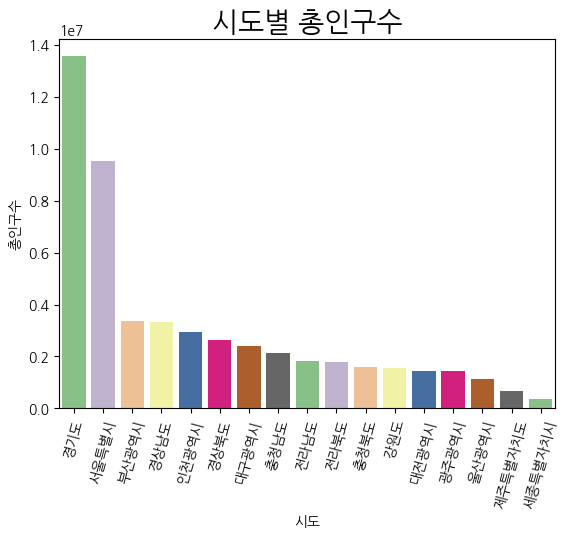

In [311]:
sns.barplot(data = df, x = '시도', y = '총인구수', palette= 'Accent', )
plt.xticks(rotation = 75)
plt.title('시도별 총인구수', fontsize = 20)
plt.show()

In [323]:
df = df.sort_values(by = '세대수', ascending = False)

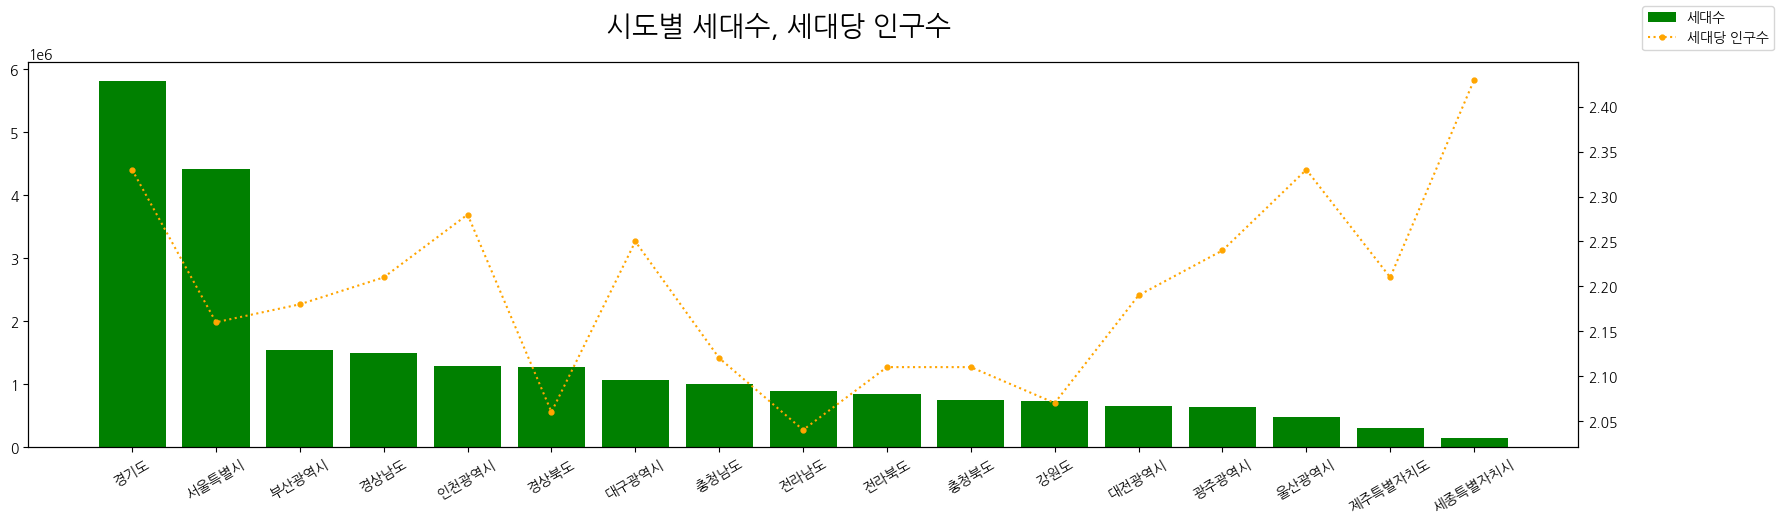

In [313]:
f, ax = plt.subplots(figsize = (20,5))
ax.bar(df['시도'], df['세대수'], color = 'green', label = '세대수')
plt.xticks(rotation = 30)
ax2 = ax.twinx() 
ax2.plot(df['시도'], df['세대당 인구'], color = 'orange', marker = '.', markersize = 7, label = '세대당 인구수', ls = ':')
f.legend()
f.suptitle('시도별 세대수, 세대당 인구수', fontsize = 20)
plt.show()

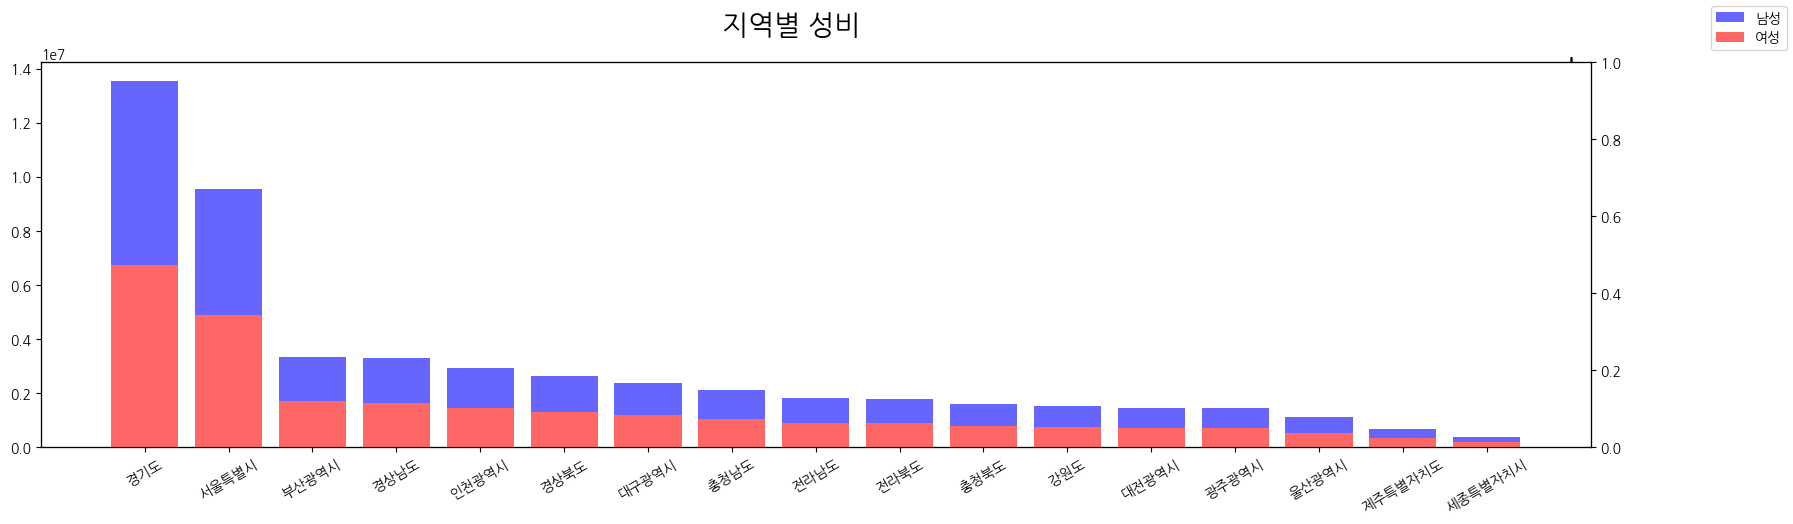

In [334]:
f, ax = plt.subplots(figsize = (20,5))
ax.bar(x = df['시도'], height = df['남자 인구수'] + df['여자 인구수'], color = '#6666ff', label = '남성')
plt.xticks(rotation = 30)
ax2 = ax.twinx()
ax2 = ax.twiny()
ax2.bar(x = df['시도'], height = df['여자 인구수'], color = '#ff6666', label = '여성')
plt.xticks(ticks = [''] * 17)
f.legend()
f.suptitle('지역별 남여 인구수', fontsize = 20)
plt.show()

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname = 'C:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font', family=font)

df = pd.read_csv('C:/code/data/202110_202110_주민등록인구및세대현황_월간.csv', encoding = 'cp949')

df.columns = df.columns.str.replace('2021년10월_계_', '')
df.columns = df.columns.str.replace('2021년10월_', '')

for col in ['총인구수', '세대수', '남자 인구수', '여자 인구수'] : 
    df[col] = df[col].apply(lambda x : int(x.replace(',', '')))

In [377]:
df = df.sort_values(by = '총인구수', ascending = False)

In [378]:
df = df[df['행정구역'].str.contains("구 \(11")]

In [379]:
df['구'] = df['행정구역'].str.split(' ').str[1]

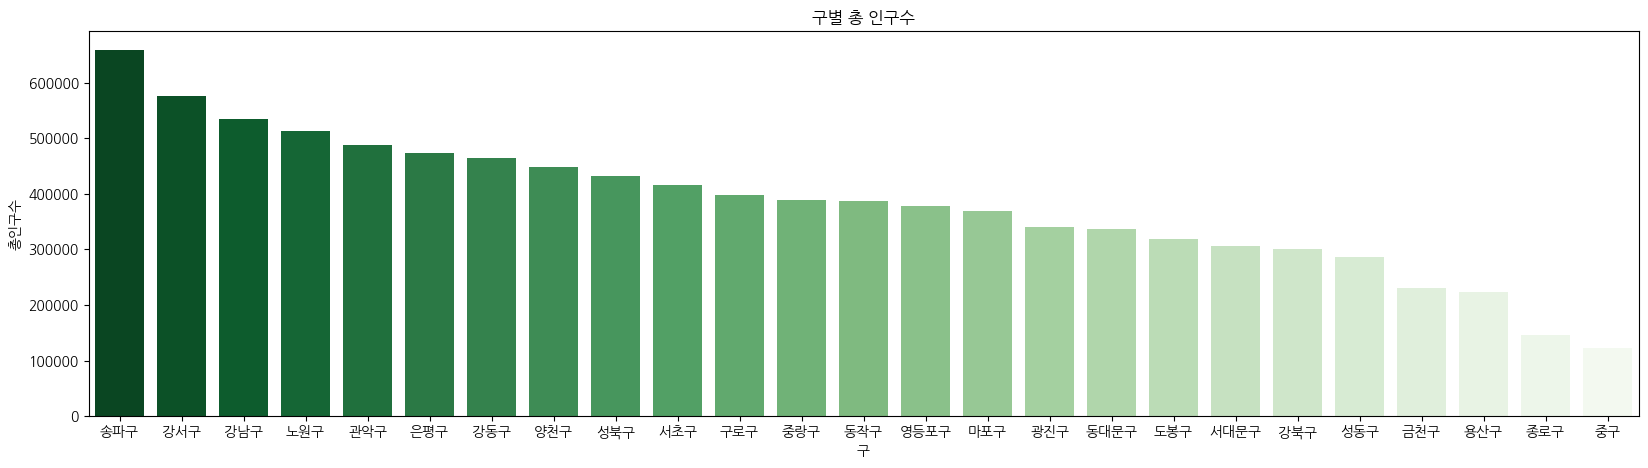

In [387]:
plt.figure(figsize = (20, 5))
sns.barplot(data = df, x = '구', y = '총인구수', palette = 'Greens_r')
plt.title('구별 총 인구수')
plt.show()


In [396]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('C:/code/data/202110_202110_주민등록인구및세대현황_월간.csv', encoding = 'cp949')

df.columns = df.columns.str.replace('2021년10월_계_', '')
df.columns = df.columns.str.replace('2021년10월_', '')

for col in ['총인구수', '세대수', '남자 인구수', '여자 인구수'] : 
    df[col] = df[col].apply(lambda x : int(x.replace(',', '')))

In [397]:
df = df[df.행정구역.str.contains('동\(')]

In [399]:
df = df[df.행정구역.str.contains('강동구')]

In [403]:
df['동'] = df.행정구역.str.split(' ').str[-1].str.split('\(').str[0]

C:\Users\sarah\AppData\Local\Temp\ipykernel_15116\1459345557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['동'] = df.행정구역.str.split(' ').str[-1].str.split('\(').str[0]


<AxesSubplot:xlabel='동', ylabel='총인구수'>

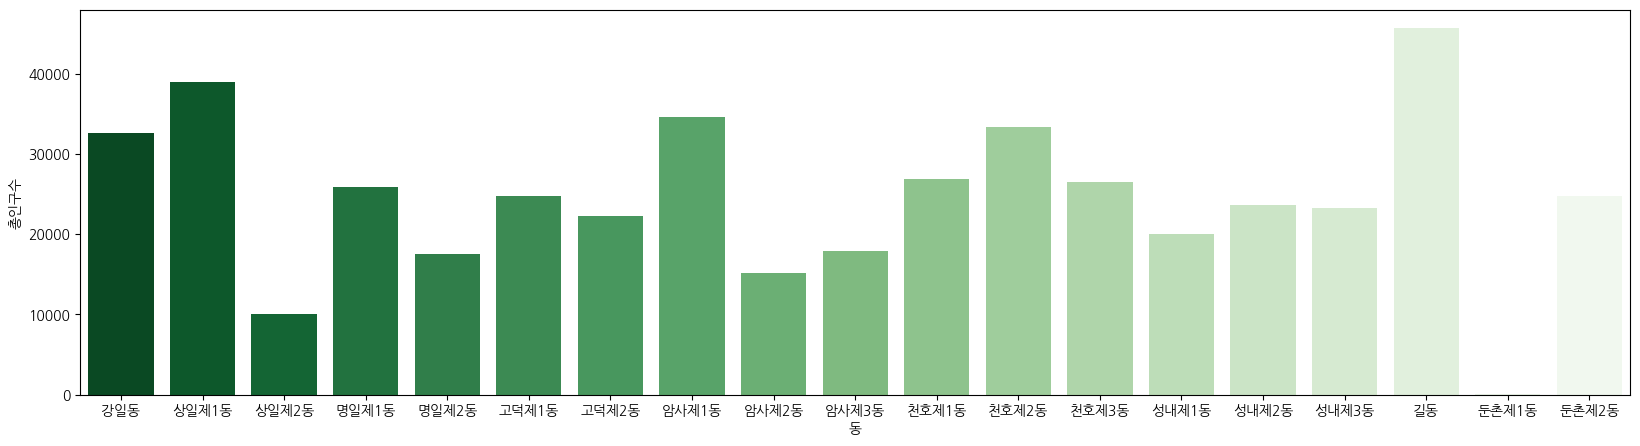

In [407]:
plt.figure(figsize = (20,5))
sns.barplot(data = df, x = '동', y = '총인구수', palette = 'Greens_r')

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname = 'C:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font', family=font)

df = pd.read_csv('C:/code/data/202110_202110_연령별인구현황_월간.csv', encoding = 'cp949')
df.columns = df.columns.str.replace('2021년10월_','')
df.columns = df.columns.str.replace('계_','')

In [439]:
for i in range(1, len(df.columns)) : 
    df.iloc[:, i] = df.iloc[:, i].apply(lambda x : int(x.replace(',','')))

In [440]:
df_sd = df[df.행정구역.str.contains('00000000')]
df_sd['시도'] = df_sd.행정구역.str.split(' ').str[0]

C:\Users\sarah\AppData\Local\Temp\ipykernel_15116\3550397482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sd['시도'] = df_sd.행정구역.str.split(' ').str[0]


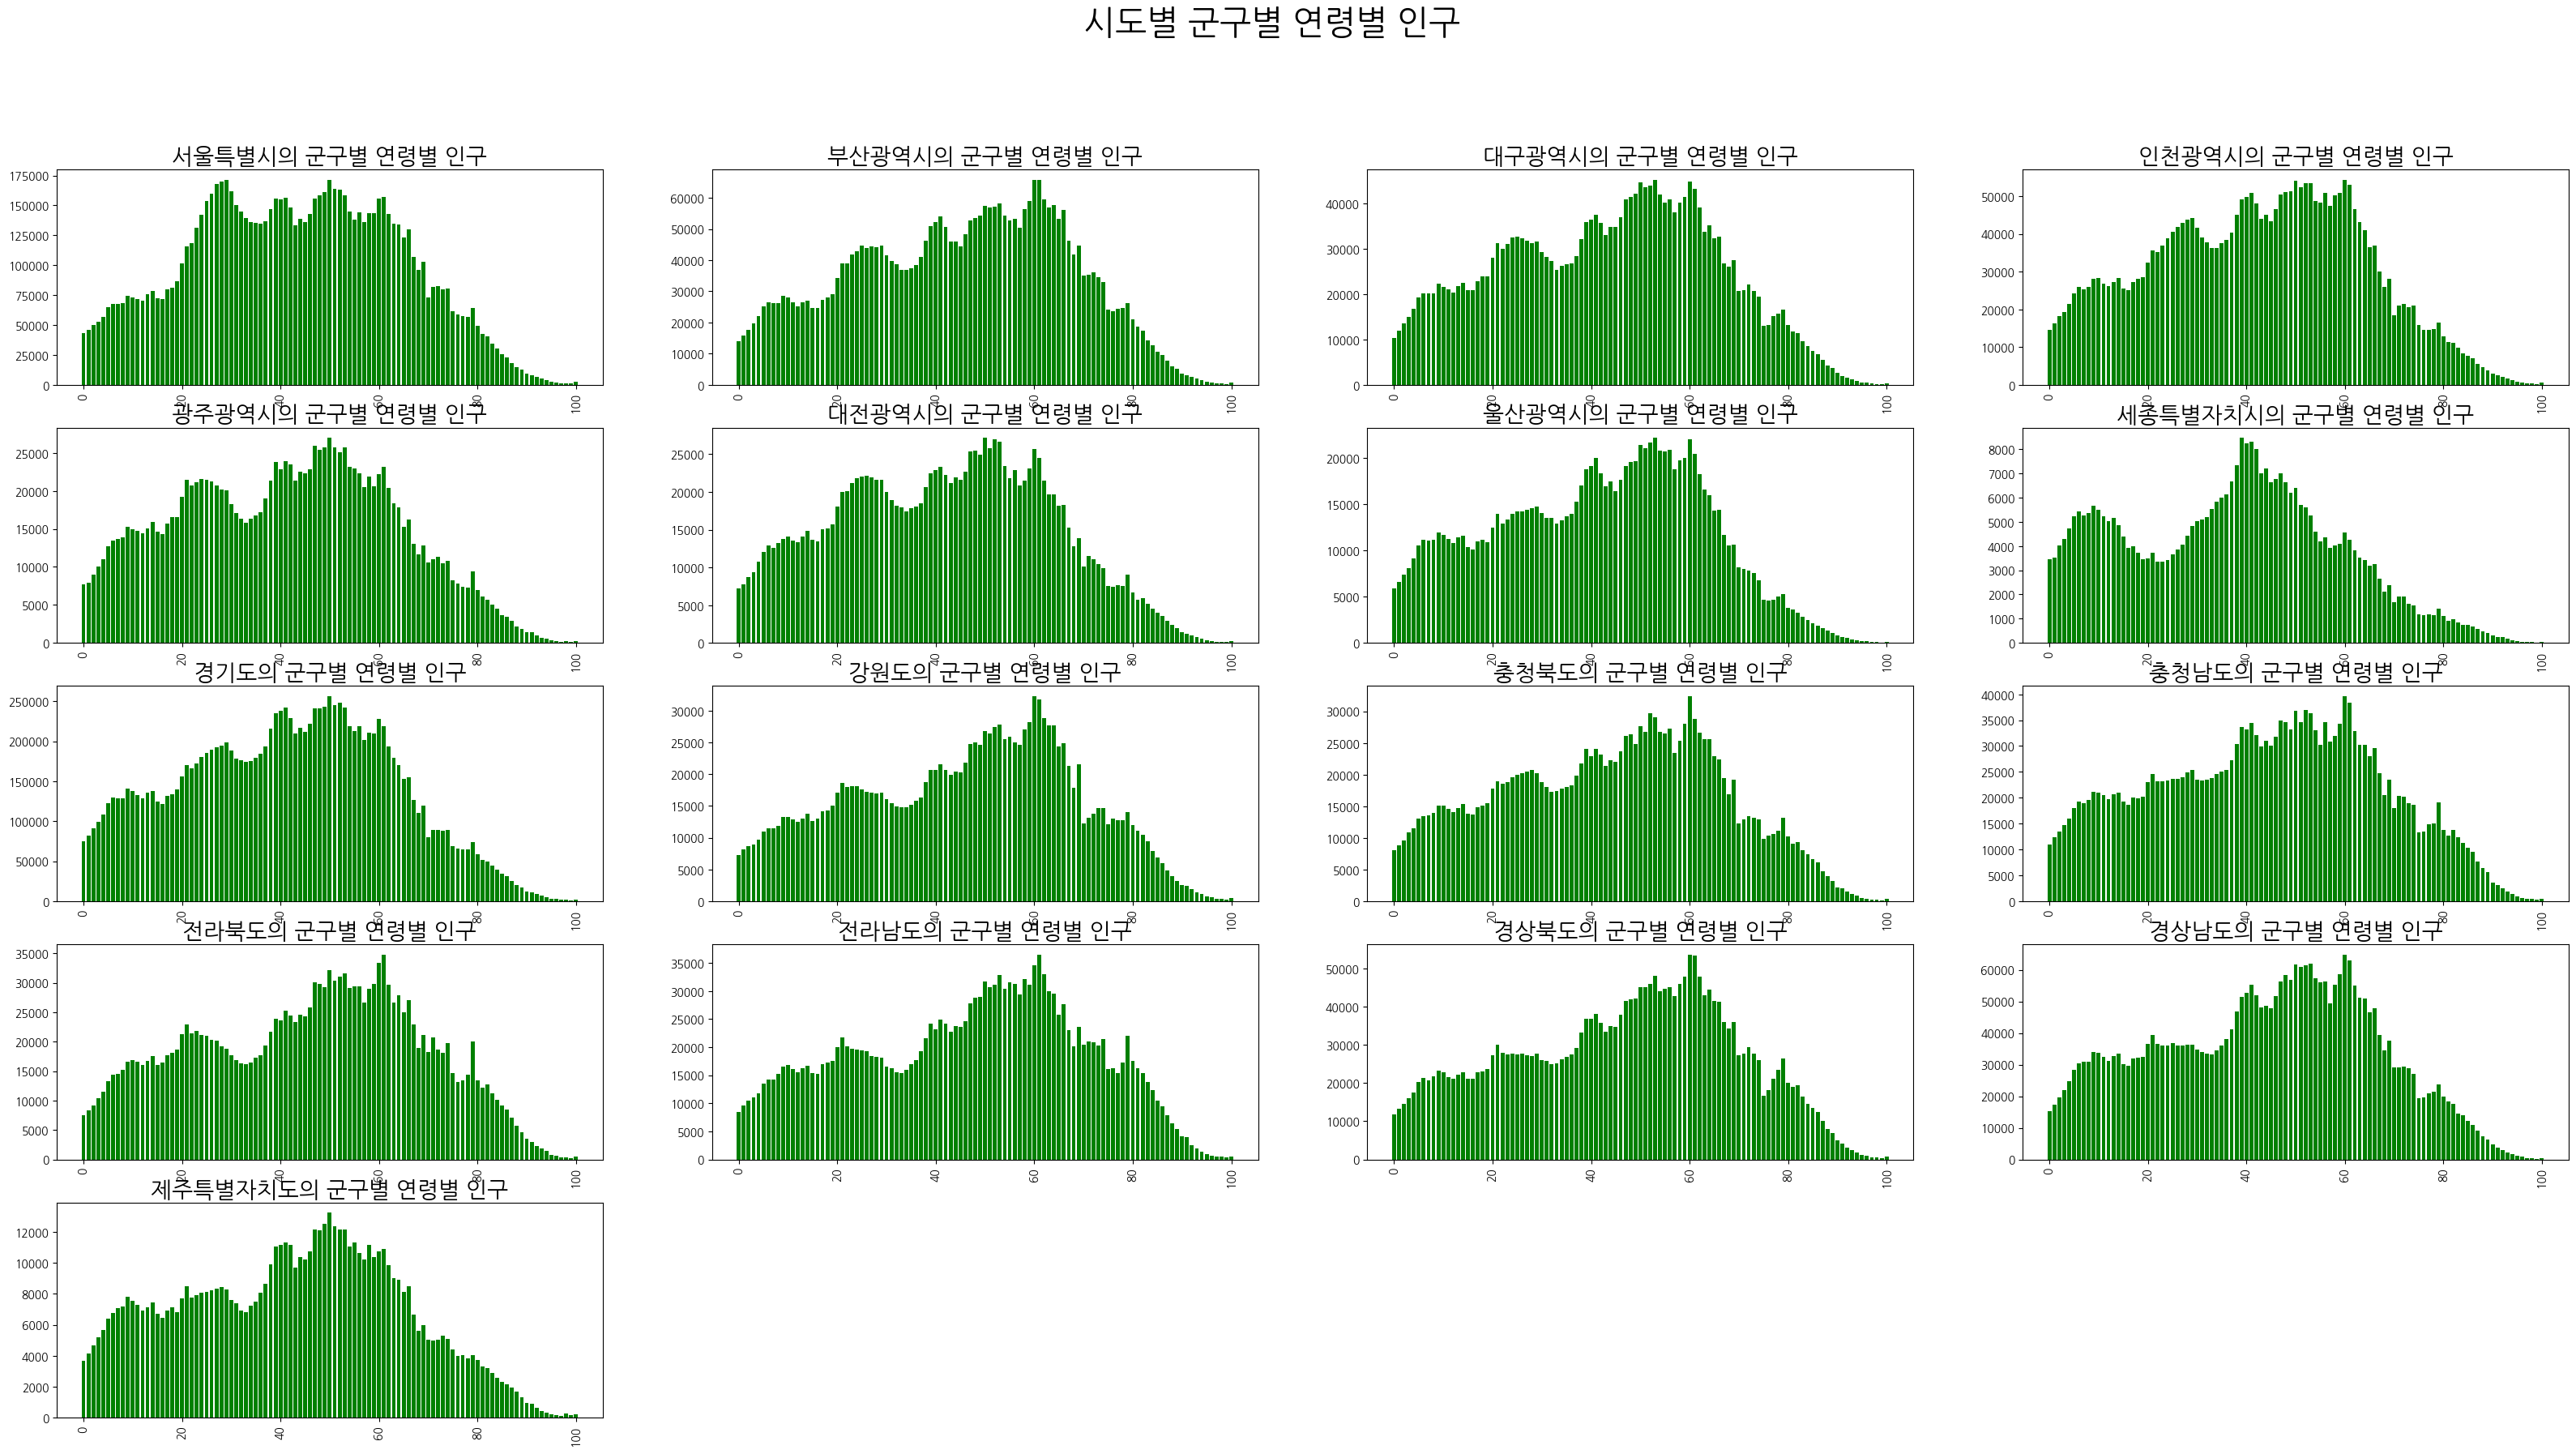

In [482]:
f = plt.figure(figsize = (40,20))

for i in range(df_sd.행정구역.nunique()) : 
    plt.subplot(5, 4, i + 1)
    plt.title(f'{df_sd.iloc[i, -1]}의 군구별 연령별 인구', fontsize = 20)
    plt.xticks(rotation = 90)
    plt.bar(x = range(101), height = df_sd.iloc[i, 3 : -1], color = 'green')

f.get_constrained_layout()
f.suptitle('시도별 군구별 연령별 인구', fontsize = 30)
plt.show()    

In [475]:
df_s = df[(df.행정구역.str.split(' ').str[0] == '서울특별시') & (df.행정구역.str.contains('구 \('))]
df_s['구'] = df.행정구역.str.split(' ').str[1]

C:\Users\sarah\AppData\Local\Temp\ipykernel_15116\1713892864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['구'] = df.행정구역.str.split(' ').str[1]


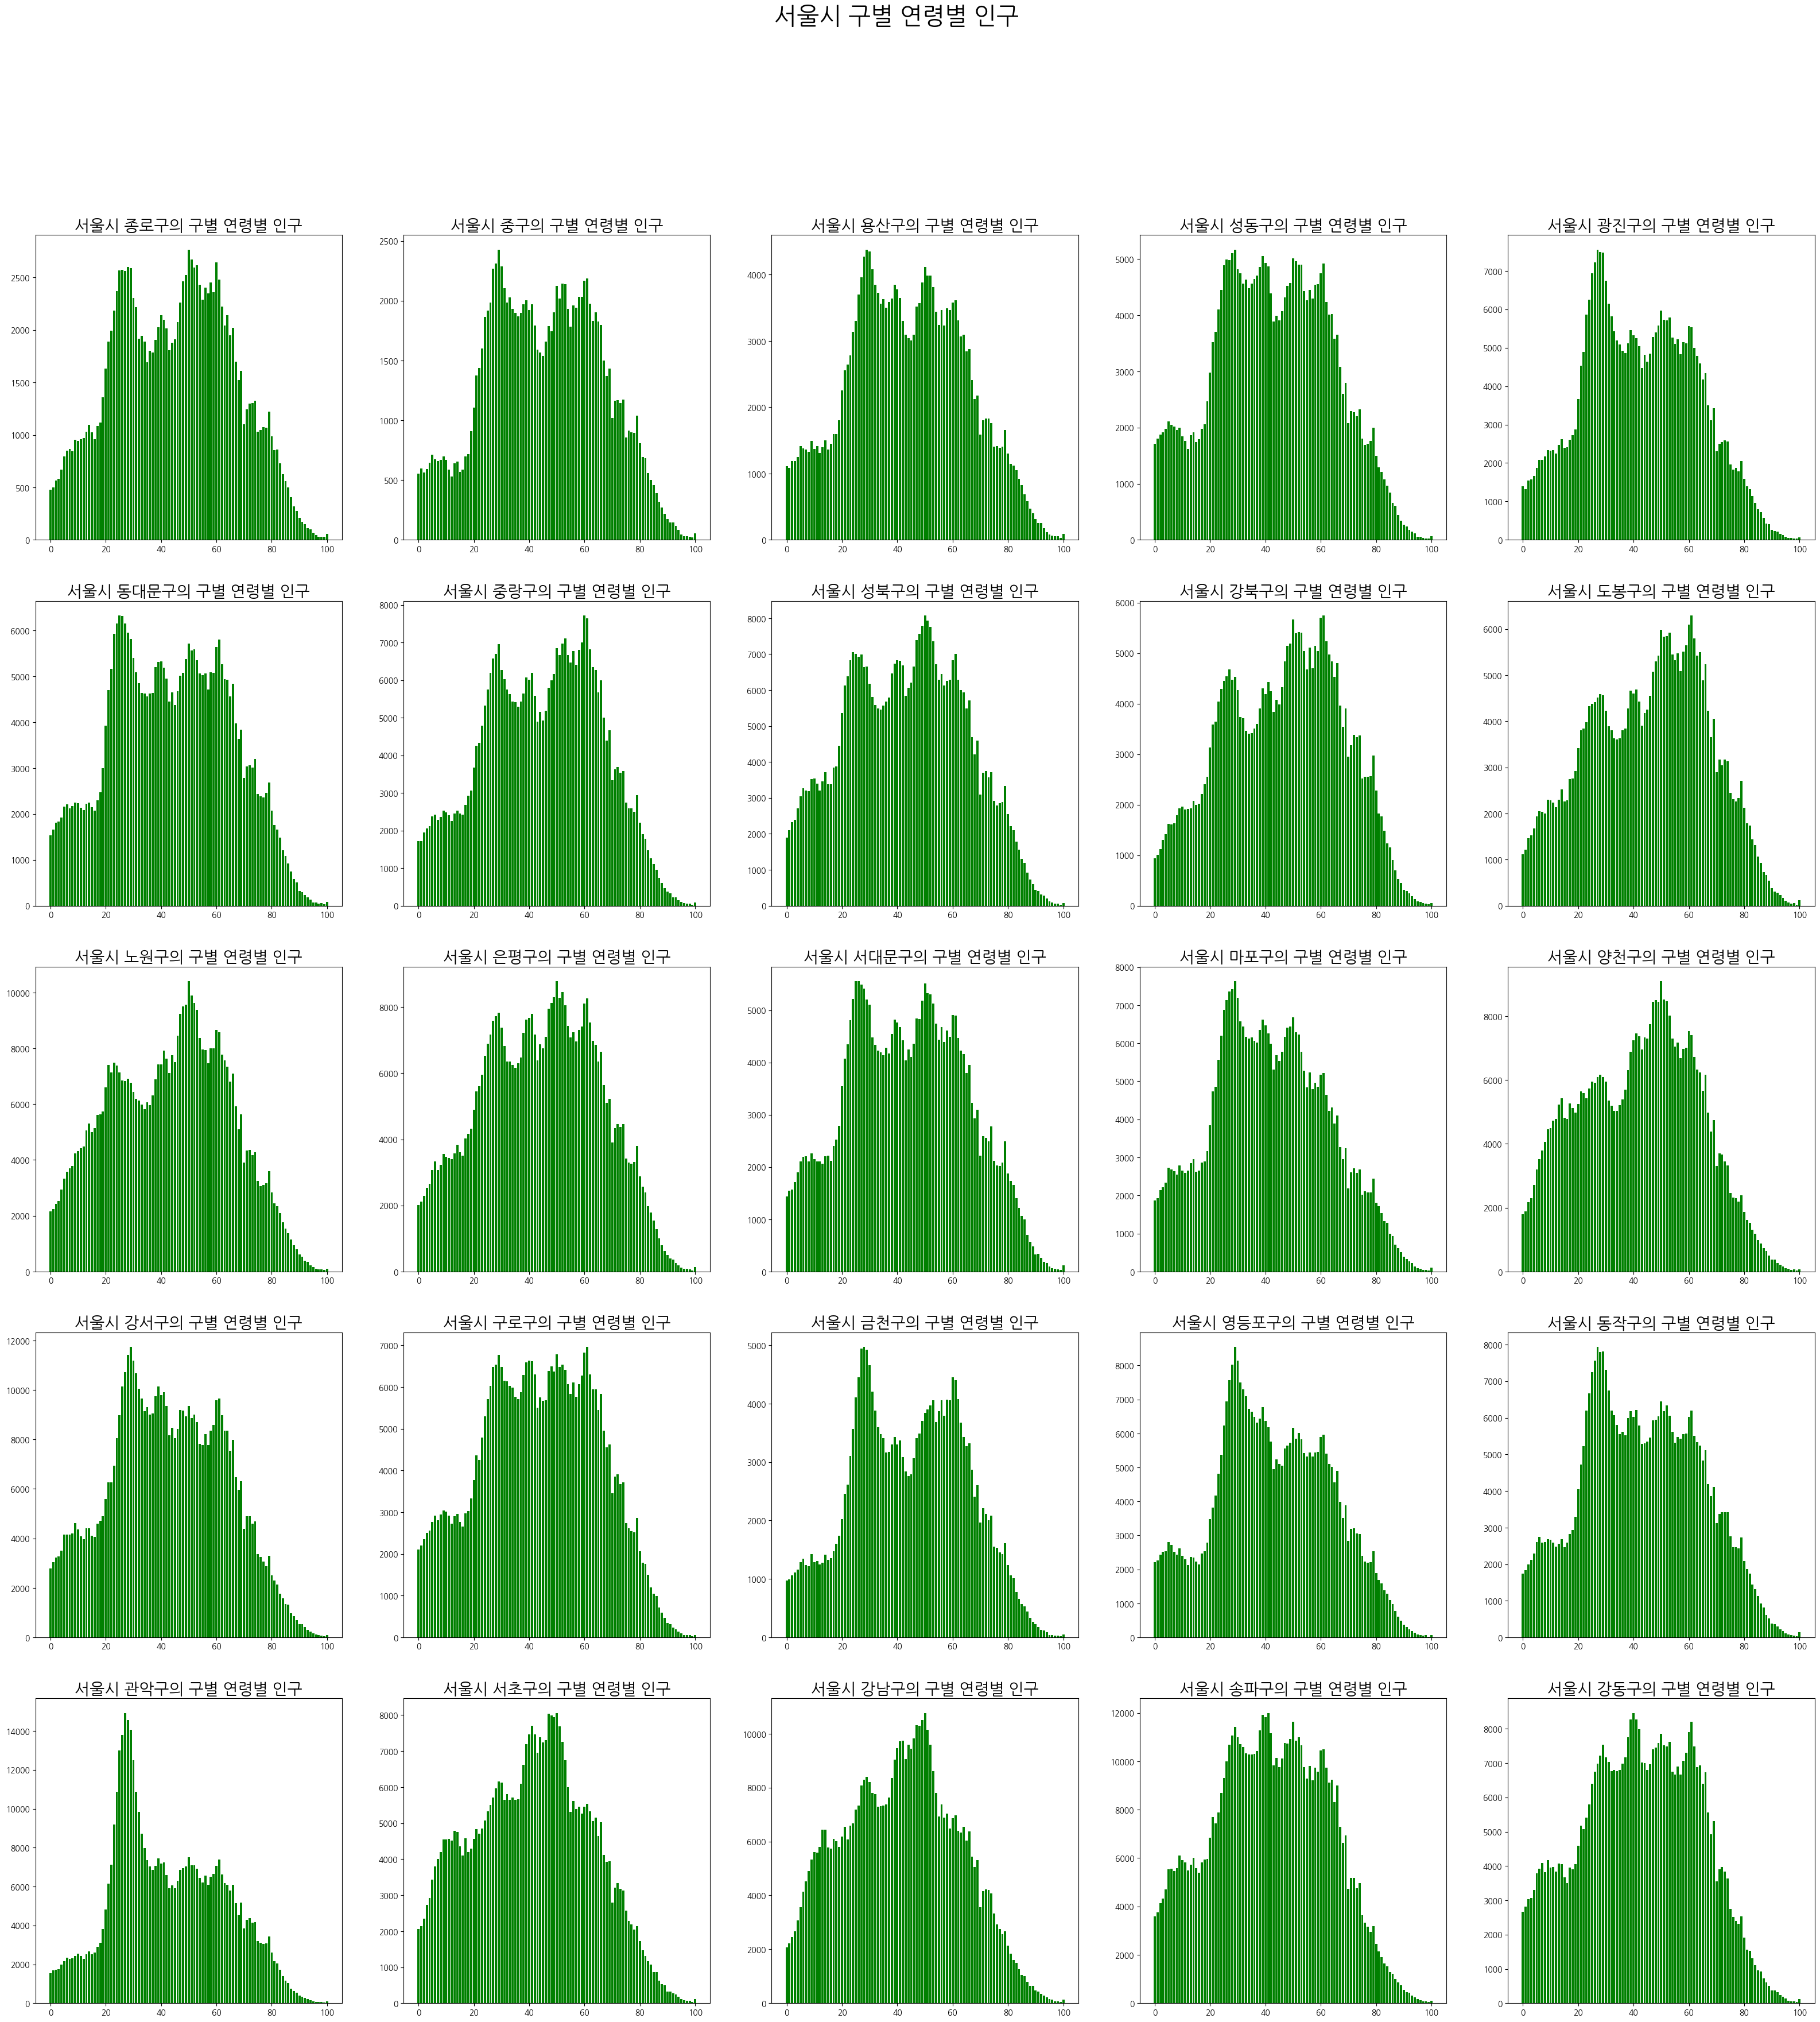

In [481]:
f = plt.figure(figsize = (40,40))

for i in range(df_s.구.nunique()) : 
    plt.subplot(5, 5, i + 1)
    plt.title(f'서울시 {df_s.iloc[i, -1]}의 구별 연령별 인구', fontsize = 20)
    plt.bar(x = range(101), height = df_s.iloc[i, 3 : -1], color = 'green')

f.get_constrained_layout()
f.suptitle('서울시 구별 연령별 인구', fontsize = 30)
plt.show()    

In [488]:
df_d = df[(df.행정구역.str.split(' ').str[1] == '강동구') & (df.행정구역.str.contains('동\('))]
df_d['동'] = df_d.행정구역.str.split(' ').str[-1].str.split('(').str[0]

C:\Users\sarah\AppData\Local\Temp\ipykernel_15116\2490579583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['동'] = df_d.행정구역.str.split(' ').str[-1].str.split('(').str[0]


In [491]:
df_d.동.nunique()

19

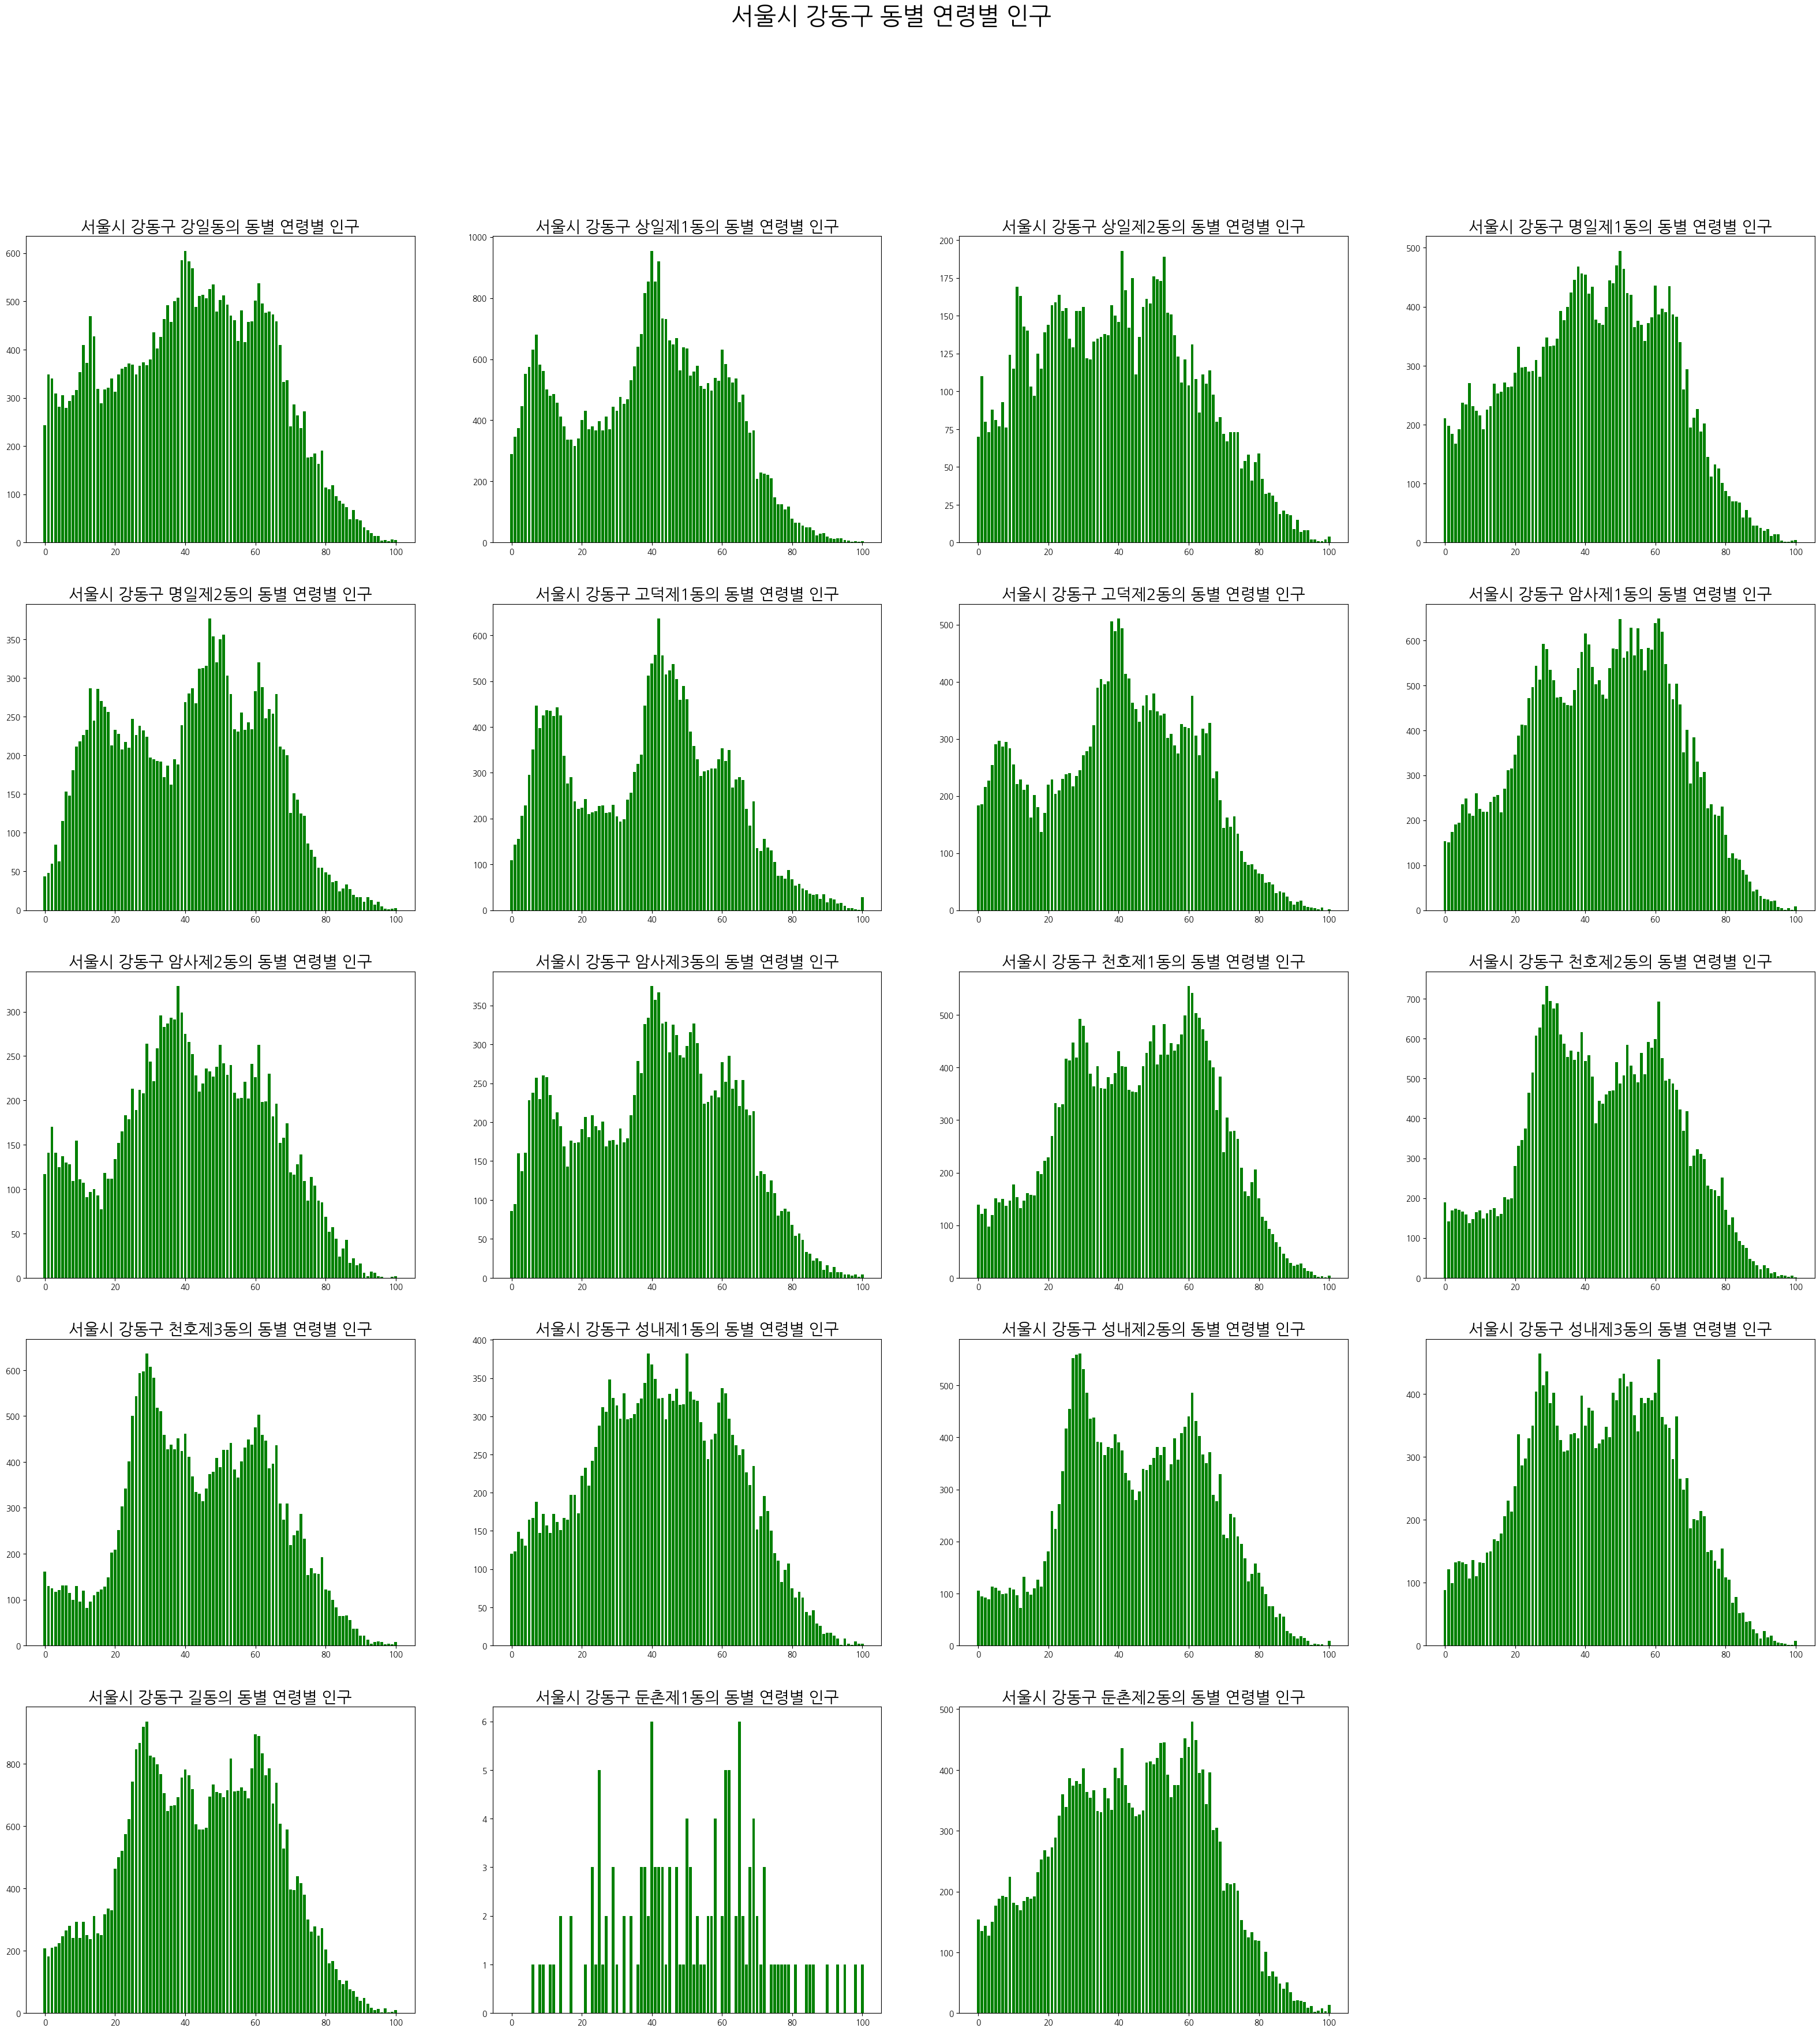

In [492]:
f = plt.figure(figsize = (40,40))

for i in range(df_d.동.nunique()) : 
    plt.subplot(5, 4, i + 1)
    plt.title(f'서울시 강동구 {df_d.iloc[i, -1]}의 동별 연령별 인구', fontsize = 20)
    plt.bar(x = range(101), height = df_d.iloc[i, 3 : -1], color = 'green')

f.get_constrained_layout()
f.suptitle('서울시 강동구 동별 연령별 인구', fontsize = 30)
plt.show()    

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname = 'C:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font', family=font)

df = pd.read_csv('C:/code/data/아파트(매매)__실거래가_20211122131854.csv', encoding = 'cp949')

In [111]:
df = df[['시군구', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)', '층', '도로명', '건축년도']]

In [112]:
# 계약일지 컬럼 생성
df['계약일자'] = df['계약년월'] * 100 + df['계약일']
df['계약일자'] = df['계약일자'].astype(str)
df['계약일자'] = pd.to_datetime(df['계약일자'].apply(lambda x : x[ : 4] + '-' + x[4 : 6] + '-' + x[6 : ]))

# 도 컬럼 생성
df.loc[df['시군구'].str.contains('도'), '도'] = df.loc[df['시군구'].str.contains('도'), '시군구'].str.split(' ').str[0]

# 시 컬럼 생성
df.loc[df['시군구'].str.split(' ').str[0].str[-1] == '시', '시'] = df.loc[df['시군구'].str.split(' ').str[0].str[-1] == '시', '시군구'].str.split(' ').str[0]
df.loc[df['시군구'].str.split(' ').str[1].str[-1] == '시', '시'] = df.loc[df['시군구'].str.split(' ').str[1].str[-1] == '시', '시군구'].str.split(' ').str[1]

# 군구 컬럼 생성
df.loc[df['시군구'].str.split(' ').str[1].str[-1] == '군', '군구'] = df.loc[df['시군구'].str.split(' ').str[1].str[-1] == '군', '시군구'].str.split(' ').str[1]
df.loc[df['시군구'].str.split(' ').str[1].str[-1] == '구', '군구'] = df.loc[df['시군구'].str.split(' ').str[1].str[-1] == '구', '시군구'].str.split(' ').str[1]

# 시이름과 군구 이름이 섞인 경우 처리
idx = df.loc[(df.군구 == '포항남구') | (df.군구 == '포항북구'),'군구'].index
df.loc[idx, '시'] = df.loc[idx, '군구'].str[ : 2] + '시'
df.loc[idx, '군구']  = df.loc[idx, '군구'].str[2 : ]

idx = df.loc[(df.군구.str.len() >= 5) & (df.군구.str.len() <= 7),'군구'].index
df.loc[idx, '시'] = df.loc[idx, '군구'].str[ : 2] + '시'
df.loc[idx, '군구']  = df.loc[idx, '군구'].str[2 : ]

df.loc[df.시.notnull() & df.시.str.contains('울산'), '도'] = '울산광역시'
df.loc[df.시.notnull() & df.시.str.contains('광역시') & df.도.isnull(), '도'] = df.loc[df.시.notnull() & df.시.str.contains('광역시') & df.도.isnull(), '시']
df.loc[df.시.notnull() & df.시.str.contains('특별시') & df.도.isnull(), '도'] = df.loc[df.시.notnull() & df.시.str.contains('특별시') & df.도.isnull(), '시']
df.loc[df.시.notnull() & df.시.str.contains('자치시') & df.도.isnull(), '도'] = df.loc[df.시.notnull() & df.시.str.contains('자치시') & df.도.isnull(), '시']

# 거래금액의 comma 제외
df['거래금액(만원)'] = df['거래금액(만원)'].apply(lambda x : int(x.replace(',', '')))

# 컬럼명 편하게 수정
df.columns = df.columns.str.replace('\(㎡\)', '')
df.columns = df.columns.str.replace('\(만원\)', '')

# 필요없는 컬럼 drop
df = df[['도', '시', '군구', '도로명', '계약일자', '전용면적(㎡)','거래금액(만원)', '층', '건축년도']]

# 면적당금액 컬럼 생성
df['면적당금액'] = np.round(df['거래금액'] / df['전용면적']).astype(int)

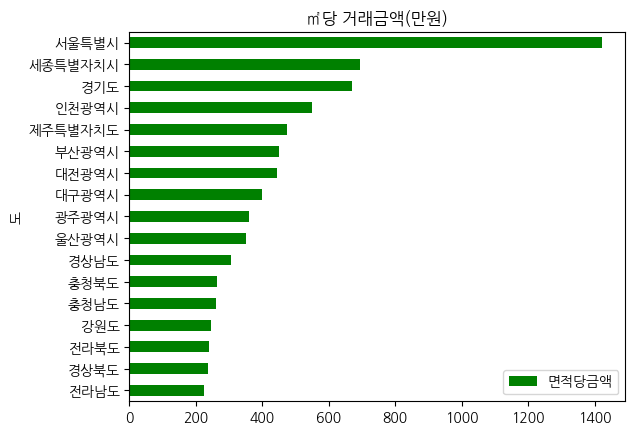

In [126]:
df.pivot_table(index = '도', values = '면적당금액', aggfunc = 'mean').sort_values(by = '면적당금액', ascending = True).plot.barh(color = 'green')
plt.title('㎡당 거래금액(만원)')
plt.show()

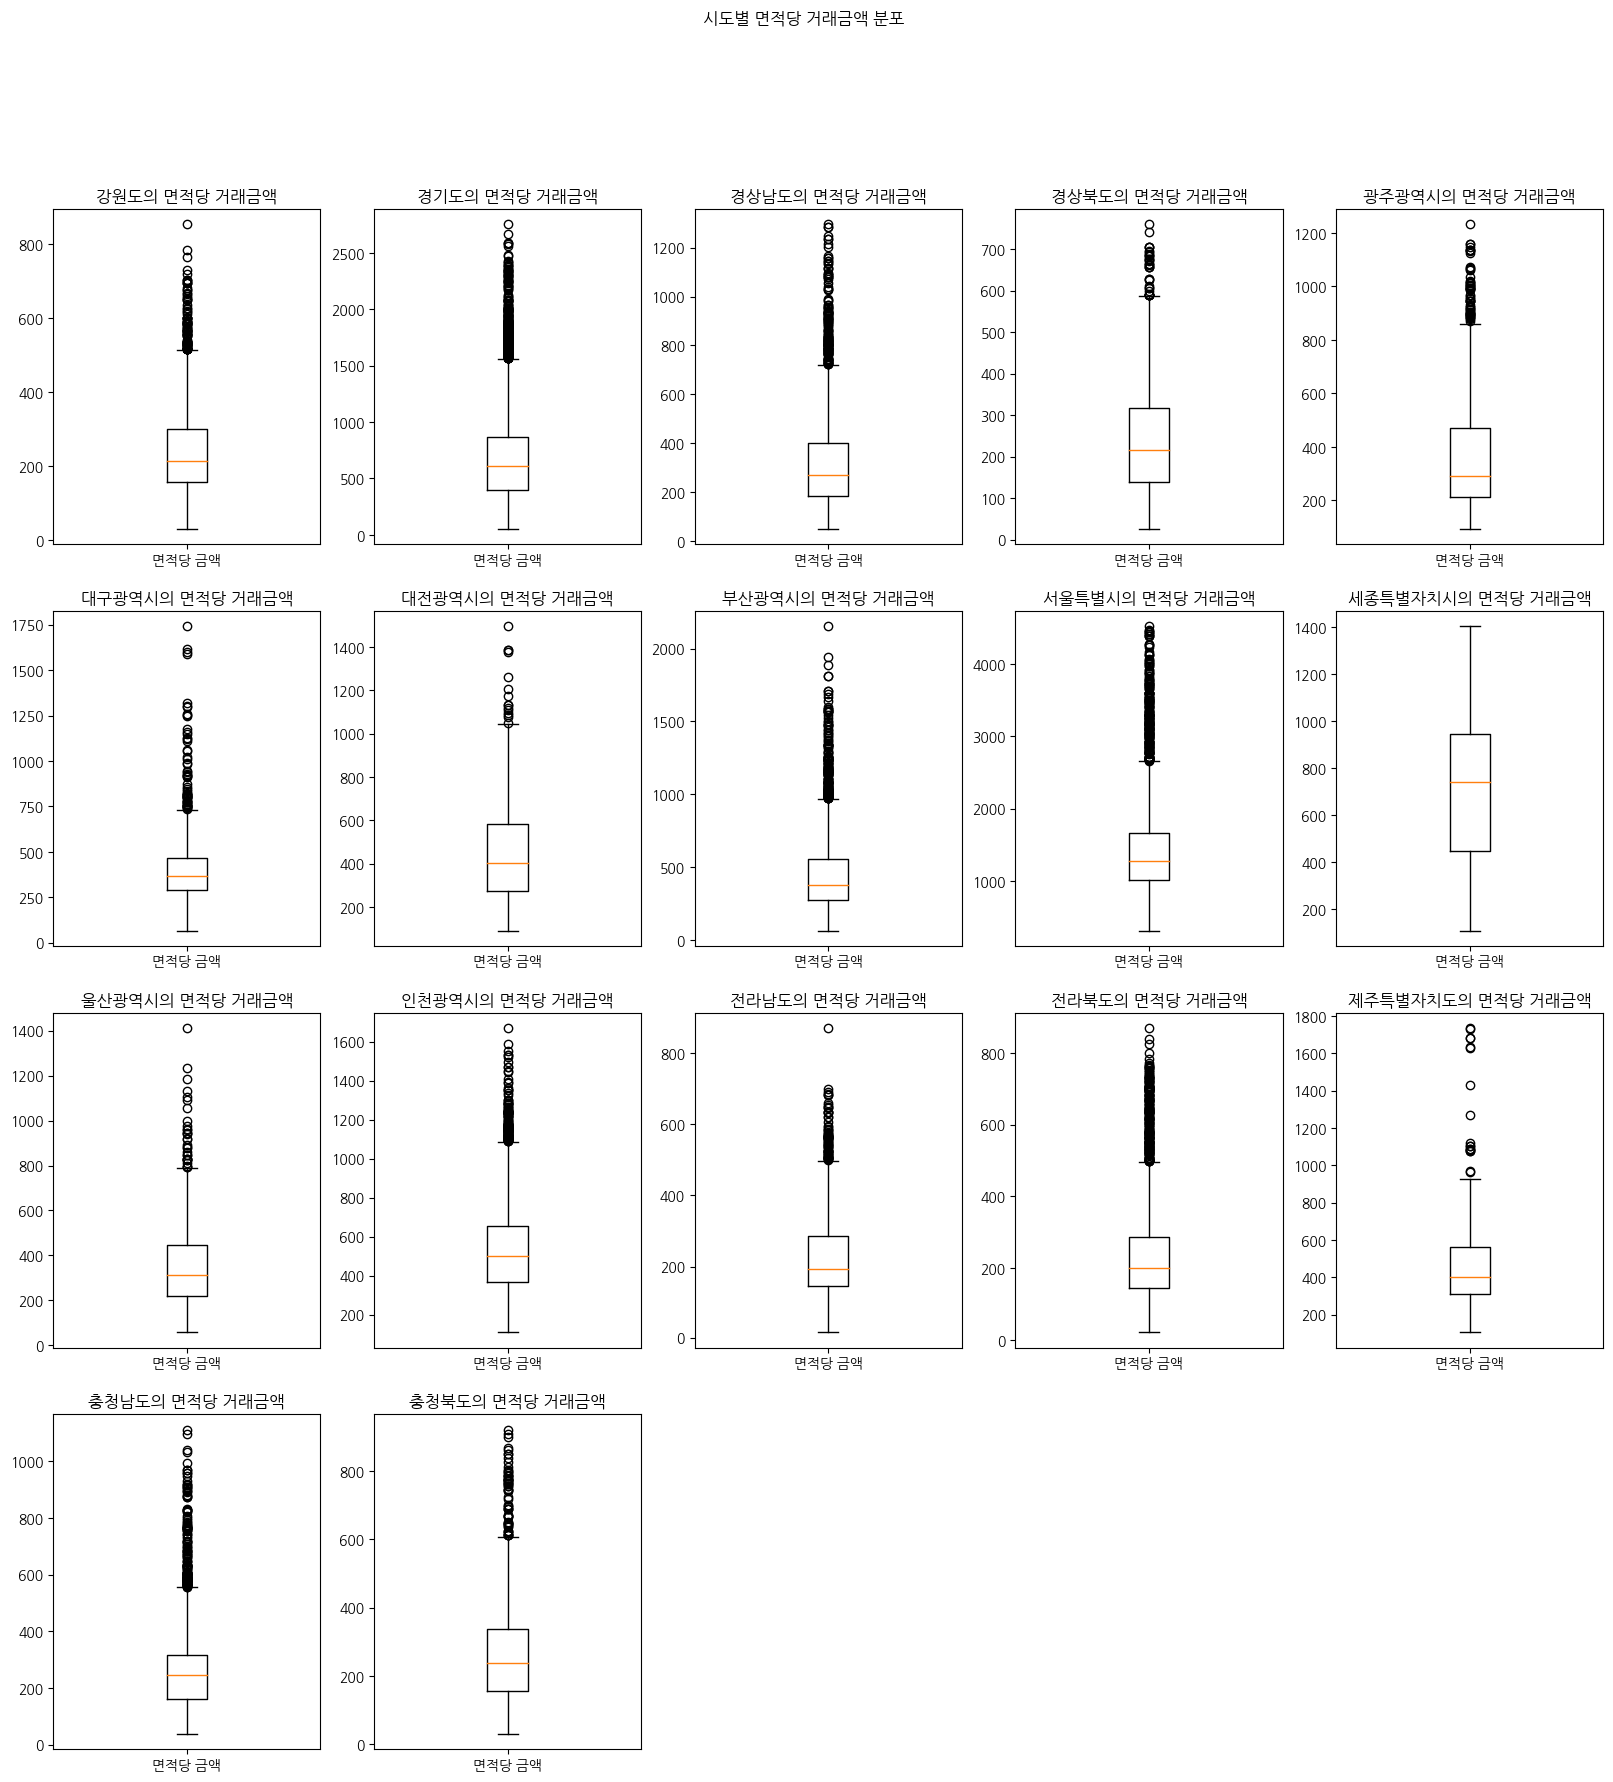

In [132]:
do_lst = list(df['도'].unique())
f = plt.figure(figsize = (20,20))
for i in range(17) : 
    plt.subplot(4, 5, i + 1)
    plt.title(f'{do_lst[i]}의 면적당 거래금액')
    plt.boxplot(df.loc[df['도'] == do_lst[i], '면적당금액'], labels = ['면적당 금액'])

f.get_constrained_layout()
f.suptitle('시도별 면적당 거래금액 분포')    
plt.show()


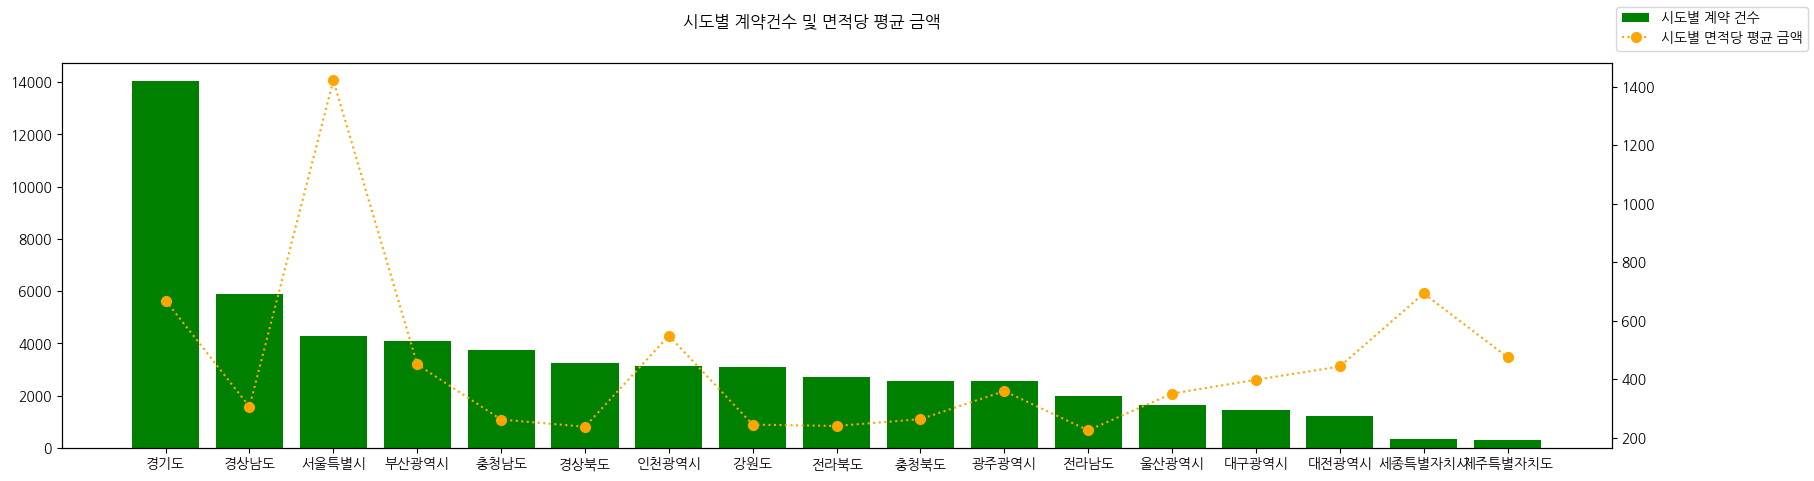

In [163]:
p = df.pivot_table(index = '도', values = '계약일자', aggfunc = 'count').sort_values('계약일자', ascending = False)
pm = df.pivot_table(index = '도', values = '면적당금액', aggfunc = 'mean')
pm = pm.loc[p.index, '면적당금액']
f, ax = plt.subplots(figsize = (20,5))
ax.bar(x = p.index, height = p['계약일자'], label = '시도별 계약 건수', color = 'green')
ax2 = ax.twinx()
ax2.plot(pm[p.index], label = '시도별 면적당 평균 금액', color = 'orange', ls = ':', marker = 'o', markersize = 7)
f.legend()
f.suptitle('시도별 계약건수 및 면적당 평균 금액')
plt.show()

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname = 'C:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font', family=font)

# area = ['부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전남','전북','경북','경남','제주',]

# df = pd.read_csv(f'C:/code/data/소상공인시장진흥공단_상가(상권)정보_서울_202109.csv', encoding = 'utf-8', low_memory = False, index_col=0)
# for a in area : 
#     df1 = pd.read_csv(f'C:/code/data/소상공인시장진흥공단_상가(상권)정보_{a}_202109.csv', encoding = 'utf-8', low_memory = False, index_col=0)
#     df = pd.concat([df, df1], axis = 0)
# df.reset_index(inplace = True)

# df.to_csv('C:/code/data/소상공인시장진흥공단_상가(상권)정보_전국_202109.csv', encoding = 'utf-8')

df = pd.read_csv('C:/code/data/소상공인시장진흥공단_상가(상권)정보_전국_202109.csv', encoding = 'utf-8', low_memory = False, index_col = 0)